In [ ]:
!pip install tensorflow==2.4.2

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=79ea2e10fd6e1124a541cdc55aa9490dbec1319b5c1b2feb7dde62dbff4010a5
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [ ]:
from Classes.DataManager import DataManager
from Classes.Transformer import projTransformer
from tensorflow import keras
import tensorflow as tf
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/Transformer.ipynb
Populating the interactive namespace from numpy and matplotlib
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


data loading takes at most 60s

In [ ]:
print("> Loading DataManager...")
dm = DataManager(transformer=True, remove_indicted=True)

print("> Loading train data...")
X_trainhalflife, X_trainpromoter, y_train, geneName_train = dm.get_train(True, True)

print("> Loading validation data...")
X_validationhalflife, X_validationpromoter, y_validation, geneName_validation, _ = dm.get_validation(True, True)

print("> Loading test data...")
X_testhalflife, X_testpromoter, y_test, geneName_test = dm.get_test(True, True)

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



Preprocessing-> Padding

In [ ]:
leftpos  = 9_500          #3_000 
rightpos = 20_000         #13_500
maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [ ]:
X_trainpromoter_p      = keras.preprocessing.sequence.pad_sequences(X_trainpromoter,      maxlen=maxlen)
X_validationpromoter_p = keras.preprocessing.sequence.pad_sequences(X_validationpromoter, maxlen=maxlen)
X_testpromoter_p       = keras.preprocessing.sequence.pad_sequences(X_testpromoter,       maxlen=maxlen)

model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500)]      0                                            
__________________________________________________________________________________________________
token_and_position_embedding (T (None, 10500, 32)    336128      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10500, 32)    6176        token_and_position_embedding[0][0
__________________________________________________________________________________________________
average_pooling1d (AveragePooli (None, 350, 32)      0           conv1d[0][0]                     
__________________________________________________________________________________

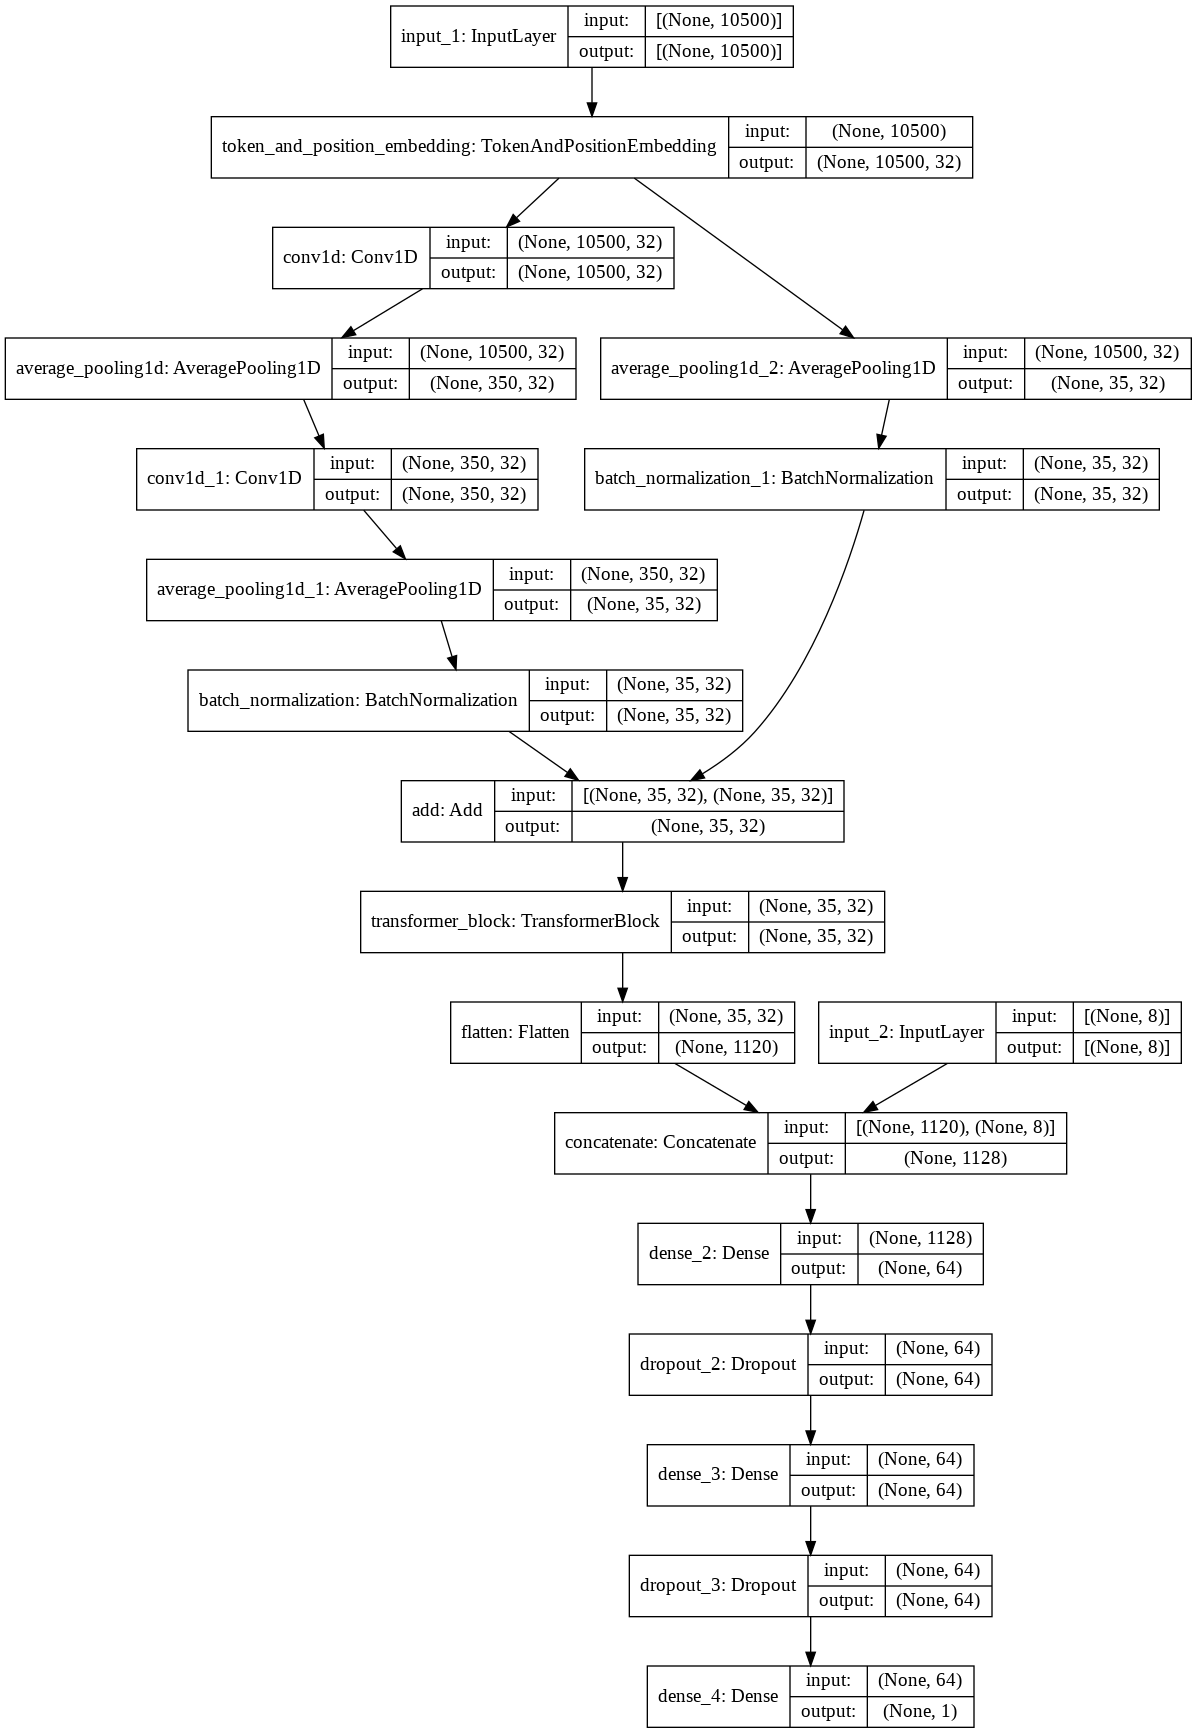


Parameters:
{'checkpoint_dir': 'embeddingweighted/', 'model_type': 'best', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.001, 'momentum': 0.9, 'maxlen': 10500, 'embed_dim': 32, 'num_heads': 1, 'ff_dim': 64, 'vocab_size': 4, 'dense': 64, 'dropout_rate': 0.1, 'lr_reduction_epoch': 60, 't_rate': 0.1, 'patience': 20, 'optimizer': 'SGD', 'warmup_steps': 8000, 'shuffle': True, 'logdir': 'transformer_best_0-001', 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fbce0088290>}

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 57s 360ms/step - loss: 0.9522 - val_loss: 0.9646

Epoch 00001: val_loss improved from inf to 0.96461, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.7127 - val_loss: 1.0967

Epoch 00002: val_loss did not improve from 0.96461
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 312ms/step - loss: 0.6734 - val_loss: 1.0134

Epoch 00003: val_loss did not improve from 0.96461
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.6561 - val_loss: 0.9321

Epoch 00004: val_loss improved from 0.96461 to 0.93211, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.6467 - val_loss: 1.0751

Epoch 00005: val_loss did not improve from 0.93211
Epoch 6/300

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.6403 - val_loss: 0.8843

Epoch 00006: val_loss improved from 0.93211 to 0.88432, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 7/300

Epoch 00007: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.6306 - val_loss: 0.7716

Epoch 00007: val_loss improved from 0.88432 to 0.77163, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 8/300

Epoch 00008: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.6169 - val_loss: 0.6342

Epoch 00008: val_loss improved from 0.77163 to 0.63421, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 9/300

Epoch 00009: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.6151 - val_loss: 0.6182

Epoch 00009: val_loss improved from 0.63421 to 0.61815, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 10/300

Epoch 00010: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.6054 - val_loss: 0.7731

Epoch 00010: val_loss did not improve from 0.61815
Epoch 11/300

Epoch 00011: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.5923 - val_loss: 0.6123

Epoch 00011: val_loss improved from 0.61815 to 0.61232, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 12/300

Epoch 00012: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.5950 - val_loss: 0.5906

Epoch 00012: val_loss improved from 0.61232 to 0.59060, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 13/300

Epoch 00013: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.5936 - val_loss: 0.7295

Epoch 00013: val_loss did not improve from 0.59060
Epoch 14/300

Epoch 00014: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.5727 - val_loss: 0.6360

Epoch 00014: val_loss did not improve from 0.59060
Epoch 15/300

Epoch 00015: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.5672 - val_loss: 1.0524

Epoch 00015: val_loss did not improve from 0.59060
Epoch 16/300

Epoch 00016: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.5505 - val_loss: 0.9358

Epoch 00016: val_loss did not improve from 0.59060
Epoch 17/300

Epoch 00017: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 19/300

Epoch 00019: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.5260 - val_loss: 0.5827

Epoch 00019: val_loss did not improve from 0.55041
Epoch 20/300

Epoch 00020: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.5216 - val_loss: 0.5299

Epoch 00020: val_loss improved from 0.55041 to 0.52990, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 21/300

Epoch 00021: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 316ms/step - loss: 0.4980 - val_loss: 0.5208

Epoch 00021: val_loss improved from 0.52990 to 0.52084, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 22/300

Epoch 00022: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 317ms/step - loss: 0.5013 - val_loss: 0.5098

Epoch 00022: val_loss improved from 0.52084 to 0.50984, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 23/300

Epoch 00023: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.4914 - val_loss: 0.5072

Epoch 00023: val_loss improved from 0.50984 to 0.50718, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 24/300

Epoch 00024: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.4770 - val_loss: 0.5601

Epoch 00024: val_loss did not improve from 0.50718
Epoch 25/300

Epoch 00025: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 316ms/step - loss: 0.4794 - val_loss: 0.8219

Epoch 00025: val_loss did not improve from 0.50718
Epoch 26/300

Epoch 00026: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.4685 - val_loss: 0.5262

Epoch 00026: val_loss did not improve from 0.50718
Epoch 27/300

Epoch 00027: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.4626 - val_loss: 0.5421

Epoch 00027: val_loss did not improve from 0.50718
Epoch 28/300

Epoch 00028: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 30/300

Epoch 00030: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.4561 - val_loss: 0.4959

Epoch 00030: val_loss improved from 0.50417 to 0.49594, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 31/300

Epoch 00031: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.4485 - val_loss: 0.5331

Epoch 00031: val_loss did not improve from 0.49594
Epoch 32/300

Epoch 00032: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.4409 - val_loss: 0.4779

Epoch 00032: val_loss improved from 0.49594 to 0.47792, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 33/300

Epoch 00033: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 316ms/step - loss: 0.4430 - val_loss: 0.9921

Epoch 00033: val_loss did not improve from 0.47792
Epoch 34/300

Epoch 00034: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 316ms/step - loss: 0.4428 - val_loss: 0.5021

Epoch 00034: val_loss did not improve from 0.47792
Epoch 35/300

Epoch 00035: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.4386 - val_loss: 0.7617

Epoch 00035: val_loss did not improve from 0.47792
Epoch 36/300

Epoch 00036: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.4281 - val_loss: 0.6733

Epoch 00036: val_loss did not improve from 0.47792
Epoch 37/300

Epoch 00037: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 39/300

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.4317 - val_loss: 0.4565

Epoch 00039: val_loss improved from 0.46125 to 0.45648, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 40/300

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.4282 - val_loss: 0.7153

Epoch 00040: val_loss did not improve from 0.45648
Epoch 41/300

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.4067 - val_loss: 0.5371

Epoch 00041: val_loss did not improve from 0.45648
Epoch 42/300

Epoch 00042: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.4136 - val_loss: 1.0448

Epoch 00042: val_loss did not improve from 0.45648
Epoch 43/300

Epoch 00043: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.4116 - val_loss: 0.5344

Epoch 00043: val_loss did not improve from 0.45648
Epoch 44/300

Epoch 00044: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 48/300

Epoch 00048: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 316ms/step - loss: 0.3948 - val_loss: 0.6448

Epoch 00048: val_loss did not improve from 0.45373
Epoch 49/300

Epoch 00049: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.3944 - val_loss: 0.4621

Epoch 00049: val_loss did not improve from 0.45373
Epoch 50/300

Epoch 00050: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 313ms/step - loss: 0.4029 - val_loss: 0.4483

Epoch 00050: val_loss improved from 0.45373 to 0.44831, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 51/300

Epoch 00051: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.3905 - val_loss: 0.5148

Epoch 00051: val_loss did not improve from 0.44831
Epoch 52/300

Epoch 00052: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 314ms/step - loss: 0.3871 - val_loss: 0.4673

Epoch 00052: val_loss did not improve from 0.44831
Epoch 53/300

Epoch 00053: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 315ms/step - loss: 0.3843 - val_loss: 0.4570

Epoch 00053: val_loss did not improve from 0.44831
Epoch 54/300

Epoch 00054: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 20s 316ms/step - loss: 0.3740 - val_loss: 0.4755

Epoch 00054: val_loss did not improve from 0.44831
Epoch 55/300

Epoch 00055: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 63/300

Epoch 00063: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 312ms/step - loss: 0.3618 - val_loss: 0.4793

Epoch 00063: val_loss did not improve from 0.44814
Epoch 64/300

Epoch 00064: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3572 - val_loss: 0.4488

Epoch 00064: val_loss did not improve from 0.44814
Epoch 65/300

Epoch 00065: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3637 - val_loss: 0.4548

Epoch 00065: val_loss did not improve from 0.44814
Epoch 66/300

Epoch 00066: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 312ms/step - loss: 0.3605 - val_loss: 0.4417

Epoch 00066: val_loss improved from 0.44814 to 0.44174, saving model to Saved_Models/ch

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 67/300

Epoch 00067: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3562 - val_loss: 0.4581

Epoch 00067: val_loss did not improve from 0.44174
Epoch 68/300

Epoch 00068: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3542 - val_loss: 0.4413

Epoch 00068: val_loss improved from 0.44174 to 0.44133, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 69/300

Epoch 00069: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3584 - val_loss: 0.4385

Epoch 00069: val_loss improved from 0.44133 to 0.43852, saving model to Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/embeddingweighted/bestmodel_transformer_best/assets


Epoch 70/300

Epoch 00070: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3541 - val_loss: 0.4458

Epoch 00070: val_loss did not improve from 0.43852
Epoch 71/300

Epoch 00071: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 312ms/step - loss: 0.3538 - val_loss: 0.4499

Epoch 00071: val_loss did not improve from 0.43852
Epoch 72/300

Epoch 00072: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3518 - val_loss: 0.4462

Epoch 00072: val_loss did not improve from 0.43852
Epoch 73/300

Epoch 00073: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
64/64 [==============================] - 20s 313ms/step - loss: 0.3573 - val_loss: 0.4736

Epoch 00073: val_loss did not improve from 0.43852
Epoch 74/300

Epoch 00074: LearningR

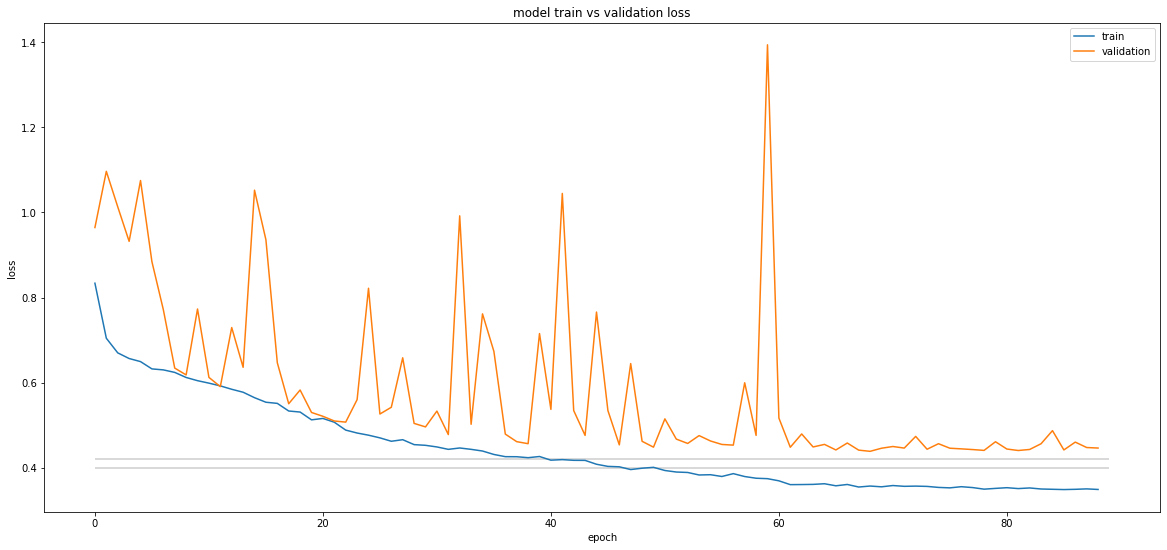

In [ ]:
# # Clear any logs from previous runs
#!rm -rf ./logs/transformer_best_0-001/

model_type="best"
logdir = None
net = projTransformer(checkpoint_dir="embeddingweighted/", model_type=model_type, n_epochs=300, batch_size=256, 
                      learning_rate=1e-3, patience=20, optimizer="SGD", vocab_size=4,
                      lr_reduction_epoch=60, maxlen=maxlen, embed_dim=32, num_heads=1, ff_dim=64, dense=64, 
                      dropout_rate=0.1, logdir=logdir, t_rate=0.1, momentum=0.9)
net.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation)

In [ ]:
net.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.597


In [ ]:
net.evaluate_best([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.598


0.5979294951329858

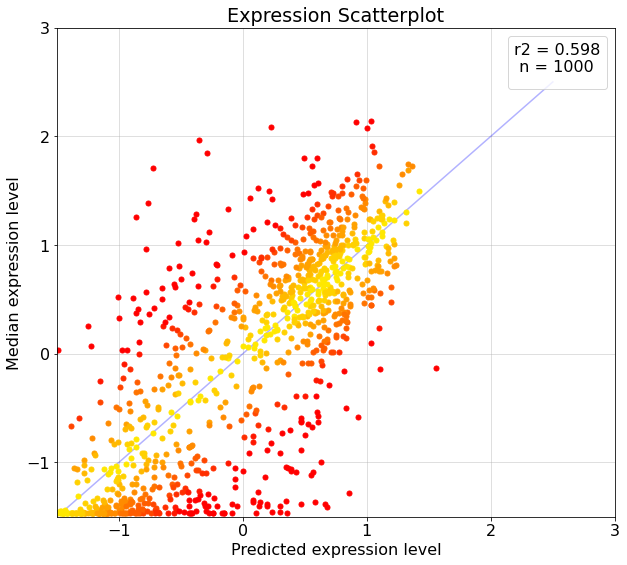

In [ ]:
net.plot_r2([X_testpromoter_p, X_testhalflife], y_test)

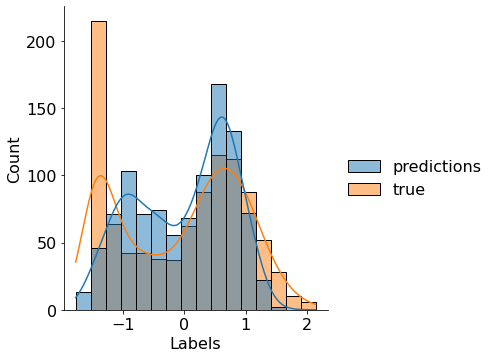

In [ ]:
net.plot_kde([X_testpromoter_p, X_testhalflife], y_test)

# COMPARISON WITH THE CURRENT BEST MODEL

In [ ]:
model = tf.keras.models.load_model('Saved_Models/top_transformers/top_transformer_2')

In [ ]:
from scipy import stats
x = [X_testpromoter_p, X_testhalflife]
predictions = model.predict(x).flatten()
slope, intercept, r_value, p_value, std_err = stats.linregress(predictions, y_test)
print('Test R^2 = %.3f' % r_value**2)

Test R^2 = 0.614


No handles with labels found to put in legend.


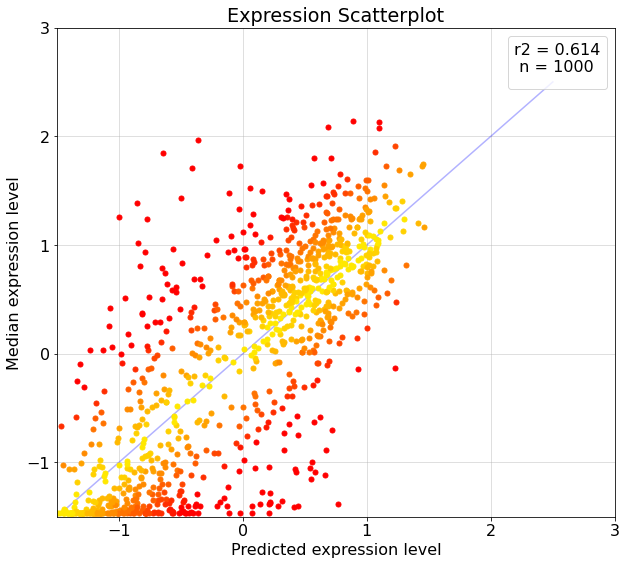

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

viridis = cm.get_cmap('autumn', 12)
diff = y_test - predictions
diff = np.abs(diff)

### plt size
plt.rcParams["figure.figsize"] = (10,9)
### plt fontsize
plt.rcParams.update({'font.size': 16})

### set title
plt.title("Expression Scatterplot")
### plot
bis = np.arange(-1.5, 3, 2)
plt.plot(bis, bis,  f"b", alpha=0.3)
for p, yi, c in zip(predictions, y_test, diff):
    plt.plot(p, yi,  f".", markersize=10, color=viridis((1.0-c)/1.1))
### set ticks
plt.xticks([i for i in range(-1, 4)])
plt.yticks([i for i in range(-1, 4)])
### set labels
plt.xlabel("Predicted expression level")
plt.ylabel("Median expression level")
### create legend
plt.legend(loc="upper right", title=f"r2 = %.3f\n n = 1000" % r_value**2)
### set ylim
plt.ylim((-1.5,3))
plt.xlim((-1.5,3))
### grid
plt.grid(alpha=0.5)
plt.show()

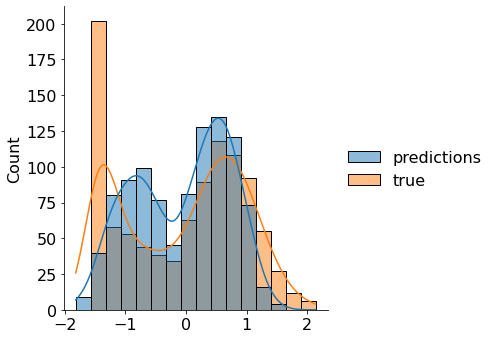

In [ ]:
df = pd.DataFrame({"predictions":predictions, "true":y_test})
ax = sns.displot(data=df, kde=True)
plt.show()